In [15]:
import intake
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import random
intake.__version__
import csv
import os
import imageio

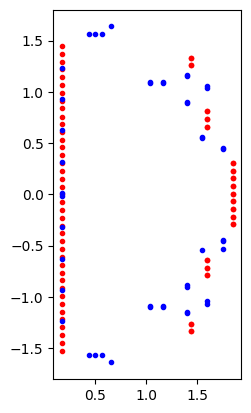

             Wave 1          Wave 2          Wave 3          Wave 4  \
0    amb_fl/cc04 \n  amb_ccbv18  \n  amb_ccbv14  \n  amb_ccbv34  \n   
1    amb_ccbv15  \n  amb_fl/p3l/2\n     amb_obv09\n     amb_obv09\n   
2    amb_ccbv04  \n  amb_ccbv36  \n  amb_fl/p5l/3\n     amb_obr04\n   
3    amb_fl/p3u/3\n  amb_ccbv20  \n  amb_fl/p6l/1\n     amb_obr06\n   
4    amb_ccbv36  \n     amb_obv19\n     amb_obr13\n  amb_fl/p5l/3\n   
..              ...             ...             ...             ...   
119             NaN             NaN             NaN             NaN   
120             NaN             NaN             NaN             NaN   
121             NaN             NaN             NaN             NaN   
122             NaN             NaN             NaN             NaN   
123             NaN             NaN             NaN             NaN   

             Wave 5          Wave 0  
0    amb_fl/cc09 \n  amb_ccbv01  \n  
1    amb_ccbv34  \n  amb_ccbv02  \n  
2               NaN  amb_ccbv03  

In [26]:
fig, axs = plt.subplots(1,1)
# Function to extract the four numbers from each entry in the file
def extract_numbers_from_file(file_path):
    sensor_names = []
    sensor_data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("a"):  # The line containing the four numbers
                # if "fl" not in str(line):
                #     continue
                sensor_names.append(str(line))
            if line.startswith("           1   "):  # The line containing the four numbers
                numbers = list(map(float, line.split()[1:]))  # Extract and convert to float
                # if len(numbers)==4:
                #     continue
                sensor_data.append([numbers[0],numbers[1],numbers[2]])
    return sensor_data,sensor_names
# Specify the path to your data file
file_path = 'Data//Input//EFIT_efit_data_detectors.dat_M4'  # Replace with your actual file path

# Extract the numbers from the file
sensor_characteristics,sensor_names  = extract_numbers_from_file(file_path)
# print(numbers_list)
sensor_characteristics = np.array(sensor_characteristics)
# Output the extracted numbers
for i in range(len(sensor_characteristics)):
    if "fl" in sensor_names[i]:
        plt.plot(sensor_characteristics[i][0],sensor_characteristics[i][1],".",color="b")
    else: 
        plt.plot(sensor_characteristics[i][0],sensor_characteristics[i][1],".",color="r")
sensor_drop_data = {
    "Wave 1": [],
    "Wave 2": [],
    "Wave 3": [],
    "Wave 4": [],
    "Wave 5": [],
}
axs.set_aspect('equal')
plt.show()
random.seed(42)
sensor_drop_data["Wave 0"] = sensor_names
sensor_drop_data["Wave 1"] = random.sample(sensor_names,93)
sensor_drop_data["Wave 2"] = random.sample(sensor_drop_data["Wave 1"],62)
sensor_drop_data["Wave 3"] = random.sample(sensor_drop_data["Wave 2"],25)
sensor_drop_data["Wave 4"] = random.sample(sensor_drop_data["Wave 3"],7)
sensor_drop_data["Wave 5"] = random.sample(sensor_drop_data["Wave 4"],2)

temp_dir = "gif_images//"
if not os.path.isdir(temp_dir):
    os.mkdir(temp_dir)
frames = []
for j in range(6):
    fig,axs = plt.subplots(1,1)
    indices_keptsensors = np.where(np.isin(sensor_names, sensor_drop_data["Wave "+str(j)]))[0]
    for i in range(len(sensor_characteristics)):
            plt.plot(sensor_characteristics[i][0],sensor_characteristics[i][1],"s",color="grey",alpha=0.8,markersize=3)
    for i in indices_keptsensors:
            plt.plot(sensor_characteristics[i][0],sensor_characteristics[i][1],"s",color="#009fe3ff",markersize=3)
    axs.set_aspect('equal')   
    axs.set_xlabel("R (m)")
    axs.set_ylabel("Z (m)")    
    frame_path = "gif_images//" + str(i) + ".png"
    plt.title("# sensors = "+str(len(indices_keptsensors)))
    plt.savefig(frame_path,bbox_inches="tight",dpi=500)     
    frames.append(imageio.v3.imread(frame_path))    
    plt.close()
output_gif = "animated_plot.gif"
imageio.mimsave(
    "Images//" + output_gif, frames, duration=1000,loop=10
)  # Adjust duration as needed

# Cleanup: remove temporary images
for file in os.listdir(temp_dir):
    os.remove(os.path.join(temp_dir, file))
os.rmdir(temp_dir)


df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in sensor_drop_data.items()]))
print(df)
df.to_csv("Data//Output//kept_sensors.csv", index=False)


First let's take a look at the top level shots. In this table we can find all of the metadata we have about particular shots.